In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import f_regression, SelectKBest, chi2, mutual_info_regression

pd.options.display.max_columns=50

In [7]:
work_p = "C:/Users/claire.smid/Documents/Main_STUDY/Model-based_learning_mainstudy/"

# Including all decision making, EFs and mental health:
#dataset = pd.read_csv(work_p+"All_DMs_EFs_MHs_Nov21.csv", sep=',') 

# Including all decision making and EFs
#dataset = pd.read_csv(work_p+"All_DMs_EFs_Nov21.csv", sep=',') 

# Including EFs and MB only
dataset = pd.read_csv(work_p+"MB_EFs_Only_Nov21.csv", sep=',') 

dataset

,ID,w,w_diff,it7,lr7,eg7,st7,repst7,Gender,Age_frac_T0,WASI_vocab_T,WASI_matrix_T,ssrt_t0,axcpt_ay_bx_t0,axcpt_PBI_t0,flankerinh_t0,flankerswitch_t0,stroop_t0,dprimeONEBACK_t0,dprimeTWOBACK_t0,Max_Span,Higher_Acc,CorrRT_2SD,B3_switch_cost_Acc,mixing_cost_Acc,B3_switch_cost_CorrRT_2SD,mixing_cost_CorrRT_2SD
0,1,0.425788,0.121567,0.625122,0.442486,0.420558,-0.177360,-0.704026,M,12.444444,62,66,260.00000,-0.174010,-0.696260,0.303618,-0.035289,-0.818045,0.958333,0.851190,7,45.454545,1847.469940,-12.918660,0.000000,176.281046,299.294872
1,4,0.528114,-0.142475,0.812849,0.685928,0.486859,-0.426516,-0.851632,F,11.838889,55,50,233.46153,0.675286,0.431760,-0.563637,-0.242714,-0.013837,0.958333,0.880952,5,16.666667,1484.030556,-27.272727,0.000000,93.596491,-9.688889
2,5,0.770192,0.132597,0.846292,0.747178,0.556262,-0.601975,-0.080824,M,7.611111,66,55,319.00000,-0.352555,-0.433764,0.140001,-0.525759,-0.205424,0.607143,-0.023810,4,0.000000,2902.550000,15.789474,-10.000000,123.828571,228.266667
3,8,0.582383,0.028154,0.652178,0.783163,0.582774,0.589636,0.395178,M,6.747222,66,55,319.00000,-0.051232,-0.063924,-1.201361,0.193632,-0.941024,0.630952,-0.166667,4,22.222222,3183.344444,11.961722,6.666667,620.166667,517.692982
4,15,0.448529,-0.036161,0.553467,0.487266,0.528799,-0.305209,-1.630474,M,10.600000,55,62,243.15384,-0.374064,-0.597904,0.246747,0.679340,0.085989,0.833333,0.833333,6,50.000000,2173.316667,0.000000,0.000000,195.210526,-68.896552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,193,0.422117,0.117357,0.436899,0.517092,0.471755,0.175653,-0.262585,M,10.486111,60,45,251.00000,0.222478,-0.059368,-0.212403,0.572747,0.187235,-0.083333,0.023810,6,36.363636,1580.202381,-9.090909,-3.333333,182.111111,-48.740741
65,195,0.610913,-0.218845,0.453946,0.367773,0.398445,-0.070527,-0.840291,M,10.372222,61,65,286.00000,0.120406,-0.064548,-0.689489,0.136637,-0.980713,0.958333,0.714286,6,45.454545,1582.988095,5.263158,-3.333333,349.235294,314.820000
66,196,0.718295,0.107204,1.387507,0.884099,0.678044,0.386831,-0.277990,M,8.608333,48,62,125.00000,-0.394379,0.600552,-0.551108,-0.580802,1.375602,0.630952,0.797619,6,27.272727,1710.119444,-16.746411,30.000000,208.400000,-555.000000
67,202,0.893768,0.043038,1.165809,0.808938,0.521772,0.873589,-0.060433,F,11.236111,66,55,275.00000,-0.556015,-0.438972,-0.551108,0.814565,-0.565334,0.880952,0.464286,7,45.454545,1904.569345,-18.181818,-6.666667,82.833333,-58.666667


In [8]:
# one hot encoding
dataset.Gender.replace(to_replace=['M','F'],value=[1,0],inplace=True)

In [9]:
dataset.head()

,ID,w,w_diff,it7,lr7,eg7,st7,repst7,Gender,Age_frac_T0,WASI_vocab_T,WASI_matrix_T,ssrt_t0,axcpt_ay_bx_t0,axcpt_PBI_t0,flankerinh_t0,flankerswitch_t0,stroop_t0,dprimeONEBACK_t0,dprimeTWOBACK_t0,Max_Span,Higher_Acc,CorrRT_2SD,B3_switch_cost_Acc,mixing_cost_Acc,B3_switch_cost_CorrRT_2SD,mixing_cost_CorrRT_2SD
0,1,0.425788,0.121567,0.625122,0.442486,0.420558,-0.177360,-0.704026,1,12.444444,62,66,260.00000,-0.174010,-0.696260,0.303618,-0.035289,-0.818045,0.958333,0.851190,7,45.454545,1847.469940,-12.918660,0.000000,176.281046,299.294872
1,4,0.528114,-0.142475,0.812849,0.685928,0.486859,-0.426516,-0.851632,0,11.838889,55,50,233.46153,0.675286,0.431760,-0.563637,-0.242714,-0.013837,0.958333,0.880952,5,16.666667,1484.030556,-27.272727,0.000000,93.596491,-9.688889
2,5,0.770192,0.132597,0.846292,0.747178,0.556262,-0.601975,-0.080824,1,7.611111,66,55,319.00000,-0.352555,-0.433764,0.140001,-0.525759,-0.205424,0.607143,-0.023810,4,0.000000,2902.550000,15.789474,-10.000000,123.828571,228.266667
3,8,0.582383,0.028154,0.652178,0.783163,0.582774,0.589636,0.395178,1,6.747222,66,55,319.00000,-0.051232,-0.063924,-1.201361,0.193632,-0.941024,0.630952,-0.166667,4,22.222222,3183.344444,11.961722,6.666667,620.166667,517.692982
4,15,0.448529,-0.036161,0.553467,0.487266,0.528799,-0.305209,-1.630474,1,10.600000,55,62,243.15384,-0.374064,-0.597904,0.246747,0.679340,0.085989,0.833333,0.833333,6,50.000000,2173.316667,0.000000,0.000000,195.210526,-68.896552


### Adding in more data

In [10]:
# Including EFs and MB only
AXCPT = pd.read_csv(work_p+"AX-CPT_individual_output_correctedSD_t0.csv", sep=',') 
AXCPT

,ID,Session,AX_Num_Trials,BX_Num_Trials,AY_Num_Trials,BY_Num_Trials,AX_Avg_RT,BX_Avg_RT,AY_Avg_RT,BY_Avg_RT,AX_Correct_Avg_RT,AX_Incorrect_Avg_RT,BX_Correct_Avg_RT,BX_Incorrect_Avg_RT,AY_Correct_Avg_RT,AY_Incorrect_Avg_RT,BY_Correct_Avg_RT,BY_Incorrect_Avg_RT,AX_Error,BX_Error,AY_Error,BY_Error,AY_BX_CorrRT_Diff,AXCPT_CorrRT_Shift_Index,AY_Inv_eff_score,BX_Inv_eff_score,AY_BX_Inv_eff_Score_Diff,AY_RCS,BX_RCS,AY_BX_RCS_Diff
0,1,0,24,12,12,12,491.886956,342.681818,560.083333,308.758333,502.750000,252.900,328.780000,570.1000,560.083333,0.000000,308.758333,0.000000,0.041667,0.166667,0.000000,0.00,0.231303,0.260224,0.560083,1.078656,0.518573,1.785449,0.927080,0.858369
1,2,0,24,12,12,12,448.659091,546.554546,517.872727,678.566667,448.659091,0.000,546.554546,0.0000,517.872727,210.700000,678.566667,0.000000,0.000000,0.000000,0.083333,0.00,-0.028682,-0.026946,0.794807,0.546555,-0.248252,1.258168,1.829644,-0.571476
2,3,0,24,12,12,12,440.490909,324.909091,465.836364,371.850000,441.609524,417.000,324.909091,0.0000,462.010000,504.100000,371.850000,0.000000,0.041667,0.000000,0.083333,0.00,0.137101,0.174225,1.053938,0.324909,-0.729029,0.948822,3.077784,-2.128962
3,4,0,24,9,12,11,394.550000,164.581818,453.441667,311.509091,388.415000,425.225,241.125000,393.1000,526.311111,234.833333,340.990000,0.000000,0.166667,0.111111,0.250000,0.00,0.285186,0.371609,1.014859,0.713503,-0.301356,0.985358,1.401536,-0.416177
4,5,0,24,12,12,12,623.640909,956.441667,1009.100000,945.200000,623.640909,2088.000,902.018182,1555.1000,1009.100000,0.000000,945.200000,0.000000,0.041667,0.083333,0.000000,0.00,0.107082,0.056031,1.009100,2.680493,1.671393,0.990982,0.373066,0.617916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,260,0,24,12,12,12,640.110909,548.945454,580.119167,436.080909,640.110909,0.000,515.396111,699.9175,575.130556,595.085000,436.080909,0.000000,0.000000,0.166667,0.250000,0.00,0.059734,0.054776,1.560287,1.458376,-0.101911,0.640908,0.685694,-0.044787
228,261,0,23,12,11,12,603.268864,530.944091,530.495500,479.772273,597.840278,555.245,520.265500,637.7300,536.933889,472.550000,437.731250,591.881667,0.217391,0.083333,0.090909,0.25,0.016668,0.015767,1.110432,1.263268,0.152836,0.900550,0.791598,0.108952
229,262,0,23,11,11,12,516.131500,850.448500,930.624545,701.880000,529.006842,271.500,842.470000,869.0650,996.183500,275.035000,701.880000,0.000000,0.043478,0.272727,0.090909,0.00,0.153714,0.083601,1.398340,2.353361,0.955020,0.715133,0.424924,0.290209
230,263,0,24,12,12,12,526.460000,303.622273,475.770833,304.461667,442.585238,3501.250,286.689500,472.9500,470.759091,530.900000,304.461667,0.000000,0.041667,0.083333,0.083333,0.00,0.184070,0.243013,1.092719,0.828698,-0.264021,0.915148,1.206713,-0.291564


In [11]:
# merge into main dataset
AXCPT_merge = AXCPT[['ID','AXCPT_CorrRT_Shift_Index','AY_Inv_eff_score','BX_Inv_eff_score','AY_BX_Inv_eff_Score_Diff',
                    'AY_RCS','BX_RCS','AY_BX_RCS_Diff']]
full1 = dataset.merge(AXCPT_merge, how='left', on='ID')


In [12]:
full1

,ID,w,w_diff,it7,lr7,eg7,st7,repst7,Gender,Age_frac_T0,WASI_vocab_T,WASI_matrix_T,ssrt_t0,axcpt_ay_bx_t0,axcpt_PBI_t0,flankerinh_t0,flankerswitch_t0,stroop_t0,dprimeONEBACK_t0,dprimeTWOBACK_t0,Max_Span,Higher_Acc,CorrRT_2SD,B3_switch_cost_Acc,mixing_cost_Acc,B3_switch_cost_CorrRT_2SD,mixing_cost_CorrRT_2SD,AXCPT_CorrRT_Shift_Index,AY_Inv_eff_score,BX_Inv_eff_score,AY_BX_Inv_eff_Score_Diff,AY_RCS,BX_RCS,AY_BX_RCS_Diff
0,1,0.425788,0.121567,0.625122,0.442486,0.420558,-0.177360,-0.704026,1,12.444444,62,66,260.00000,-0.174010,-0.696260,0.303618,-0.035289,-0.818045,0.958333,0.851190,7,45.454545,1847.469940,-12.918660,0.000000,176.281046,299.294872,0.260224,0.560083,1.078656,0.518573,1.785449,0.927080,0.858369
1,4,0.528114,-0.142475,0.812849,0.685928,0.486859,-0.426516,-0.851632,0,11.838889,55,50,233.46153,0.675286,0.431760,-0.563637,-0.242714,-0.013837,0.958333,0.880952,5,16.666667,1484.030556,-27.272727,0.000000,93.596491,-9.688889,0.371609,1.014859,0.713503,-0.301356,0.985358,1.401536,-0.416177
2,5,0.770192,0.132597,0.846292,0.747178,0.556262,-0.601975,-0.080824,1,7.611111,66,55,319.00000,-0.352555,-0.433764,0.140001,-0.525759,-0.205424,0.607143,-0.023810,4,0.000000,2902.550000,15.789474,-10.000000,123.828571,228.266667,0.056031,1.009100,2.680493,1.671393,0.990982,0.373066,0.617916
3,8,0.582383,0.028154,0.652178,0.783163,0.582774,0.589636,0.395178,1,6.747222,66,55,319.00000,-0.051232,-0.063924,-1.201361,0.193632,-0.941024,0.630952,-0.166667,4,22.222222,3183.344444,11.961722,6.666667,620.166667,517.692982,0.029162,1.776796,2.286356,0.509559,0.562811,0.437377,0.125433
4,15,0.448529,-0.036161,0.553467,0.487266,0.528799,-0.305209,-1.630474,1,10.600000,55,62,243.15384,-0.374064,-0.597904,0.246747,0.679340,0.085989,0.833333,0.833333,6,50.000000,2173.316667,0.000000,0.000000,195.210526,-68.896552,0.121451,2.167615,1.790722,-0.376892,0.461337,0.558434,-0.097097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,193,0.422117,0.117357,0.436899,0.517092,0.471755,0.175653,-0.262585,1,10.486111,60,45,251.00000,0.222478,-0.059368,-0.212403,0.572747,0.187235,-0.083333,0.023810,6,36.363636,1580.202381,-9.090909,-3.333333,182.111111,-48.740741,0.219358,0.629227,0.402836,-0.226391,1.589251,2.482398,-0.893147
65,195,0.610913,-0.218845,0.453946,0.367773,0.398445,-0.070527,-0.840291,1,10.372222,61,65,286.00000,0.120406,-0.064548,-0.689489,0.136637,-0.980713,0.958333,0.714286,6,45.454545,1582.988095,5.263158,-3.333333,349.235294,314.820000,0.089907,1.094336,0.913792,-0.180545,0.913796,1.094341,-0.180546
66,196,0.718295,0.107204,1.387507,0.884099,0.678044,0.386831,-0.277990,1,8.608333,48,62,125.00000,-0.394379,0.600552,-0.551108,-0.580802,1.375602,0.630952,0.797619,6,27.272727,1710.119444,-16.746411,30.000000,208.400000,-555.000000,0.008661,0.964536,3.303898,2.339361,1.036768,0.302673,0.734095
67,202,0.893768,0.043038,1.165809,0.808938,0.521772,0.873589,-0.060433,0,11.236111,66,55,275.00000,-0.556015,-0.438972,-0.551108,0.814565,-0.565334,0.880952,0.464286,7,45.454545,1904.569345,-18.181818,-6.666667,82.833333,-58.666667,-0.026887,1.221067,1.221168,0.000101,0.818956,0.818888,0.000068


In [13]:
# Including EFs and MB only
Flank = pd.read_csv(work_p+"Flank_T0.csv", sep=',') 
Flank

,ID,Session,Flank_Congruent_Correct,Flank_Congruent_Incorrect,Flank_Congruent_error,Flank_Incongruent_Correct,Flank_Incongruent_Incorrect,Flank_Incongruent_error,Flank_Congruent_Correct_Avg_RT,Flank_Congruent_Incorrect_Avg_RT,Flank_Incongruent_Correct_Avg_RT,Flank_Incongruent_Incorrect_Avg_RT,Flank_Congruent_RT,Flank_Incongruent_RT,T_y,Flank_Switch_RT,Flank_Stay_RT,Flank_Switch_RT_corr,Flank_Stay_RT_corr,Flank_Accuracy_Stay,Flank_Accuracy_Switch,Flank_Switch_CorrRT_Diff,Flank_Congr_CorrRT_Diff,Flank_Switch_IES,Flank_Stay_IES,Flank_Switch_IES_Diff,Flank_Con_IES,Flank_InCon_IES,Flank_InCon_IES_Diff,Flank_Stay_RCS,Flank_Switch_RCS,Flank_Switch_RCS_Diff,Flank_Con_RCS,Flank_InCon_RCS,Flank_InCon_RCS_Diff,Flank_Switch_CorrRT_Diff.1,Flank_Incon_CorrRT_Diff
0,1,0.0,20.0,0.0,0.000000,18.0,2.0,0.10,480.0,NaN,555.40,509.70,457.00,532.60,0.0,817.00,635.15,831.20,658.00,0.714286,0.666667,173.20,75.40,1.225500,0.889210,-0.336290,0.457000,0.591778,-0.134778,1.124594,0.815993,-0.308600,2.188184,1.689824,-0.498360,0.17320,0.07540
1,2,0.0,19.0,0.0,0.000000,19.0,1.0,0.05,576.3,NaN,583.70,620.70,562.20,560.65,0.0,675.25,591.15,731.40,622.95,0.857143,0.750000,108.45,7.40,0.900333,0.689675,-0.210658,0.562200,0.590158,-0.027958,1.449958,1.110700,-0.339259,1.778726,1.694462,-0.084265,0.10845,0.00740
2,3,0.0,20.0,0.0,0.000000,19.0,1.0,0.05,396.0,NaN,427.40,264.30,383.10,411.65,0.0,649.60,523.90,682.00,535.65,0.857143,0.750000,146.35,31.40,0.866133,0.611217,-0.254917,0.383100,0.433316,-0.050216,1.636081,1.154557,-0.481524,2.610285,2.307786,-0.302499,0.14635,0.03140
3,4,0.0,18.0,2.0,0.100000,20.0,0.0,0.00,533.9,401.30,601.60,NaN,497.70,580.75,0.0,666.90,694.30,707.10,731.30,0.964286,0.750000,-24.20,67.70,0.889200,0.720015,-0.169185,0.553000,0.580750,-0.027750,1.388860,1.124606,-0.264254,1.808318,1.721911,-0.086407,-0.02420,0.06770
4,5,0.0,18.0,2.0,0.100000,18.0,2.0,0.10,901.2,1016.65,1040.75,929.05,878.30,1018.00,0.0,1354.35,1182.20,1425.85,1259.45,0.714286,0.833333,166.40,139.55,1.625220,1.655080,0.029860,0.975889,1.131111,-0.155222,0.604200,0.615301,0.011101,1.024707,0.884086,-0.140620,0.16640,0.13955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,200,0.0,18.0,2.0,0.100000,17.0,3.0,0.15,525.3,1625.85,765.20,1179.20,528.55,782.05,0.0,866.40,731.20,831.80,790.20,0.785714,0.666667,41.60,239.90,1.299600,0.930618,-0.368982,0.587278,0.920059,-0.332781,1.074555,0.769468,-0.305087,1.702772,1.086887,-0.615885,0.04160,0.23990
187,201,0.0,20.0,0.0,0.000000,18.0,2.0,0.10,853.9,NaN,731.90,844.35,839.50,761.30,0.0,895.00,760.60,901.70,798.40,0.964286,1.000000,103.30,-122.00,0.895000,0.788770,-0.106230,0.839500,0.845889,-0.006389,1.267796,1.117318,-0.150478,1.191185,1.182188,-0.008997,0.10330,-0.12200
188,202,0.0,20.0,0.0,0.000000,20.0,0.0,0.00,548.0,NaN,513.50,NaN,541.10,510.15,0.0,697.85,622.70,748.50,629.35,1.000000,0.583333,119.15,-34.50,1.196314,0.622700,-0.573614,0.541100,0.510150,0.030950,1.605910,0.835901,-0.770009,1.848087,1.960208,0.112121,0.11915,-0.03450
189,203,0.0,16.0,2.0,0.111111,17.0,3.0,0.15,614.7,362.00,608.85,405.10,562.00,598.35,0.0,767.00,707.70,947.60,715.35,0.714286,0.500000,232.25,-5.85,1.534000,0.990780,-0.543220,0.632250,0.703941,-0.071691,1.009306,0.651890,-0.357415,1.581653,1.420573,-0.161080,0.23225,-0.00585


In [14]:
# merge into main dataset
Flank_merge = Flank[['ID','Flank_Switch_IES_Diff','Flank_InCon_IES_Diff','Flank_Switch_RCS_Diff','Flank_InCon_RCS_Diff',
                    'Flank_Switch_CorrRT_Diff.1','Flank_Incon_CorrRT_Diff']]
full2 = full1.merge(Flank_merge, how='left', on='ID')


In [15]:
full2

,ID,w,w_diff,it7,lr7,eg7,st7,repst7,Gender,Age_frac_T0,WASI_vocab_T,WASI_matrix_T,ssrt_t0,axcpt_ay_bx_t0,axcpt_PBI_t0,flankerinh_t0,flankerswitch_t0,stroop_t0,dprimeONEBACK_t0,dprimeTWOBACK_t0,Max_Span,Higher_Acc,CorrRT_2SD,B3_switch_cost_Acc,mixing_cost_Acc,B3_switch_cost_CorrRT_2SD,mixing_cost_CorrRT_2SD,AXCPT_CorrRT_Shift_Index,AY_Inv_eff_score,BX_Inv_eff_score,AY_BX_Inv_eff_Score_Diff,AY_RCS,BX_RCS,AY_BX_RCS_Diff,Flank_Switch_IES_Diff,Flank_InCon_IES_Diff,Flank_Switch_RCS_Diff,Flank_InCon_RCS_Diff,Flank_Switch_CorrRT_Diff.1,Flank_Incon_CorrRT_Diff
0,1,0.425788,0.121567,0.625122,0.442486,0.420558,-0.177360,-0.704026,1,12.444444,62,66,260.00000,-0.174010,-0.696260,0.303618,-0.035289,-0.818045,0.958333,0.851190,7,45.454545,1847.469940,-12.918660,0.000000,176.281046,299.294872,0.260224,0.560083,1.078656,0.518573,1.785449,0.927080,0.858369,-0.336290,-0.134778,-0.308600,-0.498360,0.17320,0.07540
1,4,0.528114,-0.142475,0.812849,0.685928,0.486859,-0.426516,-0.851632,0,11.838889,55,50,233.46153,0.675286,0.431760,-0.563637,-0.242714,-0.013837,0.958333,0.880952,5,16.666667,1484.030556,-27.272727,0.000000,93.596491,-9.688889,0.371609,1.014859,0.713503,-0.301356,0.985358,1.401536,-0.416177,-0.169185,-0.027750,-0.264254,-0.086407,-0.02420,0.06770
2,5,0.770192,0.132597,0.846292,0.747178,0.556262,-0.601975,-0.080824,1,7.611111,66,55,319.00000,-0.352555,-0.433764,0.140001,-0.525759,-0.205424,0.607143,-0.023810,4,0.000000,2902.550000,15.789474,-10.000000,123.828571,228.266667,0.056031,1.009100,2.680493,1.671393,0.990982,0.373066,0.617916,0.029860,-0.155222,0.011101,-0.140620,0.16640,0.13955
3,8,0.582383,0.028154,0.652178,0.783163,0.582774,0.589636,0.395178,1,6.747222,66,55,319.00000,-0.051232,-0.063924,-1.201361,0.193632,-0.941024,0.630952,-0.166667,4,22.222222,3183.344444,11.961722,6.666667,620.166667,517.692982,0.029162,1.776796,2.286356,0.509559,0.562811,0.437377,0.125433,NaN,NaN,NaN,NaN,NaN,NaN
4,15,0.448529,-0.036161,0.553467,0.487266,0.528799,-0.305209,-1.630474,1,10.600000,55,62,243.15384,-0.374064,-0.597904,0.246747,0.679340,0.085989,0.833333,0.833333,6,50.000000,2173.316667,0.000000,0.000000,195.210526,-68.896552,0.121451,2.167615,1.790722,-0.376892,0.461337,0.558434,-0.097097,-1.031767,-0.109500,-0.714397,-0.277322,-0.00830,0.00840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,193,0.422117,0.117357,0.436899,0.517092,0.471755,0.175653,-0.262585,1,10.486111,60,45,251.00000,0.222478,-0.059368,-0.212403,0.572747,0.187235,-0.083333,0.023810,6,36.363636,1580.202381,-9.090909,-3.333333,182.111111,-48.740741,0.219358,0.629227,0.402836,-0.226391,1.589251,2.482398,-0.893147,-0.450800,-0.058100,-0.671223,-0.117612,0.11675,0.05080
65,195,0.610913,-0.218845,0.453946,0.367773,0.398445,-0.070527,-0.840291,1,10.372222,61,65,286.00000,0.120406,-0.064548,-0.689489,0.136637,-0.980713,0.958333,0.714286,6,45.454545,1582.988095,5.263158,-3.333333,349.235294,314.820000,0.089907,1.094336,0.913792,-0.180545,0.913796,1.094341,-0.180546,-0.197448,0.071400,-0.225866,0.051139,0.15515,-0.06935
66,196,0.718295,0.107204,1.387507,0.884099,0.678044,0.386831,-0.277990,1,8.608333,48,62,125.00000,-0.394379,0.600552,-0.551108,-0.580802,1.375602,0.630952,0.797619,6,27.272727,1710.119444,-16.746411,30.000000,208.400000,-555.000000,0.008661,0.964536,3.303898,2.339361,1.036768,0.302673,0.734095,-0.157950,-0.138350,-0.125693,-0.081658,0.16165,0.14165
67,202,0.893768,0.043038,1.165809,0.808938,0.521772,0.873589,-0.060433,0,11.236111,66,55,275.00000,-0.556015,-0.438972,-0.551108,0.814565,-0.565334,0.880952,0.464286,7,45.454545,1904.569345,-18.181818,-6.666667,82.833333,-58.666667,-0.026887,1.221067,1.221168,0.000101,0.818956,0.818888,0.000068,-0.573614,0.030950,-0.770009,0.112121,0.11915,-0.03450


In [16]:
# Including EFs and MB only
Stroop = pd.read_csv(work_p+"Animalstroop_correctedSD_t0.csv", sep=',') 
Stroop

,ID,Session,Neutral_Correct,Neutral_Incorrect,Neutral_error,Incongruent_Correct,Incongruent_Incorrect,Incongruent_error,Neutral_Avg_RT,Incongruent_Avg_RT,Neutral_Correct_Avg_RT,Neutral_Incorrect_Avg_RT,Incongruent_Correct_Avg_RT,Incongruent_Incorrect_Avg_RT,Stroop_InCon_CorrRT_Diff,Stroop_Con_IES,Stroop_InCon_IES,Stroop_InCon_IES_Diff,Stroop_Con_RCS,Stroop_InCon_RCS,Stroop_Incon_RCS_Diff
0,1,0,32,4,0.111111,33,3,0.083333,891.235294,1002.212121,887.033333,922.750000,995.133333,1073.000000,0.108100,1.002640,1.093322,-0.090683,0.997367,0.914643,-0.082724
1,2,0,35,1,0.027778,32,4,0.111111,1089.542857,1241.588235,1077.294118,1506.000000,1218.866667,1436.750000,0.141573,1.120673,1.396787,-0.276114,0.892321,0.715929,-0.176392
2,3,0,34,2,0.055556,36,0,0.000000,988.205882,950.093750,973.218750,1228.000000,950.093750,NaN,-0.023125,1.046336,0.950094,0.096242,0.955716,1.052528,0.096811
3,4,0,29,7,0.194444,27,9,0.250000,835.382353,973.727273,881.851852,656.142857,1048.080000,646.111111,0.166228,1.037026,1.298303,-0.261277,0.964296,0.770236,-0.194059
4,5,0,33,3,0.083333,34,2,0.055556,1454.718750,1672.352941,1426.774194,52.333333,1683.484848,652.500000,0.256711,1.586966,1.770727,-0.183761,0.630133,0.564740,-0.065393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,197,0,32,4,0.111111,30,6,0.166667,1096.029412,1279.781250,1094.870968,431.250000,1356.392857,938.833333,0.261522,1.233033,1.535738,-0.302704,0.811008,0.651153,-0.159855
190,200,0,33,3,0.083333,33,3,0.083333,1408.375000,1583.125000,1411.300000,909.666667,1592.064516,487.333333,0.180765,1.536409,1.727045,-0.190636,0.650868,0.579024,-0.071845
191,201,0,33,3,0.083333,33,3,0.083333,1167.258065,1300.322581,1167.258065,0.000000,1264.033333,0.000000,0.096775,1.273372,1.418534,-0.145161,0.785316,0.704953,-0.080363
192,202,0,35,1,0.027778,35,1,0.027778,1002.628571,1109.277778,992.735294,1339.000000,1116.485714,857.000000,0.123750,1.031275,1.140971,-0.109696,0.969673,0.876446,-0.093227


In [17]:
# merge into main dataset
Stroop_merge = Stroop[['ID','Stroop_InCon_CorrRT_Diff','Stroop_InCon_IES_Diff','Stroop_Incon_RCS_Diff']]
full3 = full2.merge(Stroop_merge, how='left', on='ID')

In [18]:
full3

,ID,w,w_diff,it7,lr7,eg7,st7,repst7,Gender,Age_frac_T0,WASI_vocab_T,WASI_matrix_T,ssrt_t0,axcpt_ay_bx_t0,axcpt_PBI_t0,flankerinh_t0,flankerswitch_t0,stroop_t0,dprimeONEBACK_t0,dprimeTWOBACK_t0,Max_Span,Higher_Acc,CorrRT_2SD,B3_switch_cost_Acc,mixing_cost_Acc,B3_switch_cost_CorrRT_2SD,mixing_cost_CorrRT_2SD,AXCPT_CorrRT_Shift_Index,AY_Inv_eff_score,BX_Inv_eff_score,AY_BX_Inv_eff_Score_Diff,AY_RCS,BX_RCS,AY_BX_RCS_Diff,Flank_Switch_IES_Diff,Flank_InCon_IES_Diff,Flank_Switch_RCS_Diff,Flank_InCon_RCS_Diff,Flank_Switch_CorrRT_Diff.1,Flank_Incon_CorrRT_Diff,Stroop_InCon_CorrRT_Diff,Stroop_InCon_IES_Diff,Stroop_Incon_RCS_Diff
0,1,0.425788,0.121567,0.625122,0.442486,0.420558,-0.177360,-0.704026,1,12.444444,62,66,260.00000,-0.174010,-0.696260,0.303618,-0.035289,-0.818045,0.958333,0.851190,7,45.454545,1847.469940,-12.918660,0.000000,176.281046,299.294872,0.260224,0.560083,1.078656,0.518573,1.785449,0.927080,0.858369,-0.336290,-0.134778,-0.308600,-0.498360,0.17320,0.07540,0.108100,-0.090683,-0.082724
1,4,0.528114,-0.142475,0.812849,0.685928,0.486859,-0.426516,-0.851632,0,11.838889,55,50,233.46153,0.675286,0.431760,-0.563637,-0.242714,-0.013837,0.958333,0.880952,5,16.666667,1484.030556,-27.272727,0.000000,93.596491,-9.688889,0.371609,1.014859,0.713503,-0.301356,0.985358,1.401536,-0.416177,-0.169185,-0.027750,-0.264254,-0.086407,-0.02420,0.06770,0.166228,-0.261277,-0.194059
2,5,0.770192,0.132597,0.846292,0.747178,0.556262,-0.601975,-0.080824,1,7.611111,66,55,319.00000,-0.352555,-0.433764,0.140001,-0.525759,-0.205424,0.607143,-0.023810,4,0.000000,2902.550000,15.789474,-10.000000,123.828571,228.266667,0.056031,1.009100,2.680493,1.671393,0.990982,0.373066,0.617916,0.029860,-0.155222,0.011101,-0.140620,0.16640,0.13955,0.256711,-0.183761,-0.065393
3,8,0.582383,0.028154,0.652178,0.783163,0.582774,0.589636,0.395178,1,6.747222,66,55,319.00000,-0.051232,-0.063924,-1.201361,0.193632,-0.941024,0.630952,-0.166667,4,22.222222,3183.344444,11.961722,6.666667,620.166667,517.692982,0.029162,1.776796,2.286356,0.509559,0.562811,0.437377,0.125433,NaN,NaN,NaN,NaN,NaN,NaN,0.249776,-0.137995,-0.026730
4,15,0.448529,-0.036161,0.553467,0.487266,0.528799,-0.305209,-1.630474,1,10.600000,55,62,243.15384,-0.374064,-0.597904,0.246747,0.679340,0.085989,0.833333,0.833333,6,50.000000,2173.316667,0.000000,0.000000,195.210526,-68.896552,0.121451,2.167615,1.790722,-0.376892,0.461337,0.558434,-0.097097,-1.031767,-0.109500,-0.714397,-0.277322,-0.00830,0.00840,0.190444,-0.358446,-0.187808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,193,0.422117,0.117357,0.436899,0.517092,0.471755,0.175653,-0.262585,1,10.486111,60,45,251.00000,0.222478,-0.059368,-0.212403,0.572747,0.187235,-0.083333,0.023810,6,36.363636,1580.202381,-9.090909,-3.333333,182.111111,-48.740741,0.219358,0.629227,0.402836,-0.226391,1.589251,2.482398,-0.893147,-0.450800,-0.058100,-0.671223,-0.117612,0.11675,0.05080,0.260657,-0.270273,-0.168538
65,195,0.610913,-0.218845,0.453946,0.367773,0.398445,-0.070527,-0.840291,1,10.372222,61,65,286.00000,0.120406,-0.064548,-0.689489,0.136637,-0.980713,0.958333,0.714286,6,45.454545,1582.988095,5.263158,-3.333333,349.235294,314.820000,0.089907,1.094336,0.913792,-0.180545,0.913796,1.094341,-0.180546,-0.197448,0.071400,-0.225866,0.051139,0.15515,-0.06935,-0.022666,-0.012149,-0.006888
66,196,0.718295,0.107204,1.387507,0.884099,0.678044,0.386831,-0.277990,1,8.608333,48,62,125.00000,-0.394379,0.600552,-0.551108,-0.580802,1.375602,0.630952,0.797619,6,27.272727,1710.119444,-16.746411,30.000000,208.400000,-555.000000,0.008661,0.964536,3.303898,2.339361,1.036768,0.302673,0.734095,-0.157950,-0.138350,-0.125693,-0.081658,0.16165,0.14165,0.109794,-0.108457,-0.063854
67,202,0.893768,0.043038,1.165809,0.808938,0.521772,0.873589,-0.060433,0,11.236111,66,55,275.00000,-0.556015,-0.438972,-0.551108,0.814565,-0.565334,0.880952,0.464286,7,45.454545,1904.569345,-18.18181

In [19]:
# Including EFs and MB only
Nback = pd.read_csv(work_p+"N-Back_individual_output_correctedSD_t0.csv", sep=',') 
Nback

,ID,Session,1Back_Num_Trials,1Back_Num_Hits,1Back_Num_Correct_Rejections,1Back_Num_FalseAlarms,1Back_Num_Misses,1Back_Hits_av_RT,1Back_FalseAlarms_av_RT,2Back_Num_Trials,2Back_Num_Hits,2Back_Num_Correct_Rejections,2Back_Num_FalseAlarms,2Back_Num_Misses,2Back_Hits_av_RT,2Back_FalseAlarms_av_RT,Nback_1_IES,Nback_2_IES,Nback_1_2_IES_Diff,Nback_1_RCS,Nback_2_RCS,Nback_1_2_RCS_Diff
0,1,0,40,12,28,0,0,4132.909091,0.0,40,12,25,3,0,4696.900000,4779.333333,4.132909,8.765515833,-4.632606742,0.241960,0.114083417,-0.127876901
1,2,0,40,12,28,0,0,4068.500000,0.0,40,11,26,2,1,5148.000000,4304.500000,4.068500,8.7435625,-4.6750625,0.245791,0.114369858,-0.131420974
2,3,0,40,12,26,2,0,4403.916667,4887.5,40,10,27,1,2,4120.700000,4177.000000,8.826846,7.6753725,1.151473334,0.113291,0.130286836,0.016996085
3,4,0,40,12,28,0,0,3663.333333,0.0,40,11,27,1,1,3835.727273,4655.000000,3.663333,8.066190909,-4.402857576,0.272975,0.123974254,-0.149001178
4,5,0,40,9,24,4,3,5147.285714,5147.0,40,1,25,3,11,3652.000000,5147.000000,8.492786,5.71935,2.773435714,0.117747,0.174845044,0.057098048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,197,0,40,12,27,1,0,5001.833333,4998.0,40,5,21,7,7,4207.400000,4376.571429,9.749837,5.579581429,4.170256071,0.102566,0.179224914,0.076659102
192,200,0,40,12,28,0,0,4986.500000,0.0,40,5,26,2,7,4934.200000,4986.500000,4.986500,7.6885425,-2.7020425,0.200541,0.130063663,-0.070477799
193,201,0,40,12,28,0,0,4986.000000,0.0,40,10,27,1,2,4986.000000,4986.000000,4.986000,9.2241,-4.2381,0.200562,0.108411661,-0.092149912
194,202,0,40,11,27,1,1,4221.545455,3259.0,40,6,27,1,6,3991.833333,4986.000000,7.106518,7.4067125,-0.300194317,0.140716,0.135012666,-0.00570322


In [20]:
# merge into main dataset
Nback_merge = Nback[['ID','Nback_1_2_IES_Diff','Nback_1_2_RCS_Diff','Nback_1_RCS','Nback_2_RCS']]
full4 = full3.merge(Nback_merge, how='left', on='ID')

In [21]:
full4

,ID,w,w_diff,it7,lr7,eg7,st7,repst7,Gender,Age_frac_T0,WASI_vocab_T,WASI_matrix_T,ssrt_t0,axcpt_ay_bx_t0,axcpt_PBI_t0,flankerinh_t0,flankerswitch_t0,stroop_t0,dprimeONEBACK_t0,dprimeTWOBACK_t0,Max_Span,Higher_Acc,CorrRT_2SD,B3_switch_cost_Acc,mixing_cost_Acc,B3_switch_cost_CorrRT_2SD,mixing_cost_CorrRT_2SD,AXCPT_CorrRT_Shift_Index,AY_Inv_eff_score,BX_Inv_eff_score,AY_BX_Inv_eff_Score_Diff,AY_RCS,BX_RCS,AY_BX_RCS_Diff,Flank_Switch_IES_Diff,Flank_InCon_IES_Diff,Flank_Switch_RCS_Diff,Flank_InCon_RCS_Diff,Flank_Switch_CorrRT_Diff.1,Flank_Incon_CorrRT_Diff,Stroop_InCon_CorrRT_Diff,Stroop_InCon_IES_Diff,Stroop_Incon_RCS_Diff,Nback_1_2_IES_Diff,Nback_1_2_RCS_Diff,Nback_1_RCS,Nback_2_RCS
0,1,0.425788,0.121567,0.625122,0.442486,0.420558,-0.177360,-0.704026,1,12.444444,62,66,260.00000,-0.174010,-0.696260,0.303618,-0.035289,-0.818045,0.958333,0.851190,7,45.454545,1847.469940,-12.918660,0.000000,176.281046,299.294872,0.260224,0.560083,1.078656,0.518573,1.785449,0.927080,0.858369,-0.336290,-0.134778,-0.308600,-0.498360,0.17320,0.07540,0.108100,-0.090683,-0.082724,-4.632606742,-0.127876901,0.241960,0.114083417
1,4,0.528114,-0.142475,0.812849,0.685928,0.486859,-0.426516,-0.851632,0,11.838889,55,50,233.46153,0.675286,0.431760,-0.563637,-0.242714,-0.013837,0.958333,0.880952,5,16.666667,1484.030556,-27.272727,0.000000,93.596491,-9.688889,0.371609,1.014859,0.713503,-0.301356,0.985358,1.401536,-0.416177,-0.169185,-0.027750,-0.264254,-0.086407,-0.02420,0.06770,0.166228,-0.261277,-0.194059,-4.402857576,-0.149001178,0.272975,0.123974254
2,5,0.770192,0.132597,0.846292,0.747178,0.556262,-0.601975,-0.080824,1,7.611111,66,55,319.00000,-0.352555,-0.433764,0.140001,-0.525759,-0.205424,0.607143,-0.023810,4,0.000000,2902.550000,15.789474,-10.000000,123.828571,228.266667,0.056031,1.009100,2.680493,1.671393,0.990982,0.373066,0.617916,0.029860,-0.155222,0.011101,-0.140620,0.16640,0.13955,0.256711,-0.183761,-0.065393,2.773435714,0.057098048,0.117747,0.174845044
3,8,0.582383,0.028154,0.652178,0.783163,0.582774,0.589636,0.395178,1,6.747222,66,55,319.00000,-0.051232,-0.063924,-1.201361,0.193632,-0.941024,0.630952,-0.166667,4,22.222222,3183.344444,11.961722,6.666667,620.166667,517.692982,0.029162,1.776796,2.286356,0.509559,0.562811,0.437377,0.125433,NaN,NaN,NaN,NaN,NaN,NaN,0.249776,-0.137995,-0.026730,5.405265,0.126305489,0.102242,0.228547398
4,15,0.448529,-0.036161,0.553467,0.487266,0.528799,-0.305209,-1.630474,1,10.600000,55,62,243.15384,-0.374064,-0.597904,0.246747,0.679340,0.085989,0.833333,0.833333,6,50.000000,2173.316667,0.000000,0.000000,195.210526,-68.896552,0.121451,2.167615,1.790722,-0.376892,0.461337,0.558434,-0.097097,-1.031767,-0.109500,-0.714397,-0.277322,-0.00830,0.00840,0.190444,-0.358446,-0.187808,0.7676475,0.043276287,0.216780,0.260056718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,193,0.422117,0.117357,0.436899,0.517092,0.471755,0.175653,-0.262585,1,10.486111,60,45,251.00000,0.222478,-0.059368,-0.212403,0.572747,0.187235,-0.083333,0.023810,6,36.363636,1580.202381,-9.090909,-3.333333,182.111111,-48.740741,0.219358,0.629227,0.402836,-0.226391,1.589251,2.482398,-0.893147,-0.450800,-0.058100,-0.671223,-0.117612,0.11675,0.05080,0.260657,-0.270273,-0.168538,-0.660835714,-0.01799779,0.174274,0.15627625
65,195,0.610913,-0.218845,0.453946,0.367773,0.398445,-0.070527,-0.840291,1,10.372222,61,65,286.00000,0.120406,-0.064548,-0.689489,0.136637,-0.980713,0.958333,0.714286,6,45.454545,1582.988095,5.263158,-3.333333,349.235294,314.820000,0.089907,1.094336,0.913792,-0.180545,0.913796,1.094341,-0.180546,-0.197448,0.071400,-0.225866,0.051139,0.15515,-0.06935,-0.022666,-0.012149,-0.006888,-2.028027273,-0.066583708,0.217520,0.150936561
66,196,0.718295,0.107204,1.387507,0.884099,0.678044,0.386831,-0.277990,1,8.608333,48,62,125.00000,-0.394379,0.600552,-0.551108,-0.580802,1.375602,0.630952,0.797619,6,27.272727,1710.1194

In [22]:
# Including EFs and MB only
SSRT = pd.read_csv(work_p+"all_SSRT_output_T0.csv", sep=',') 
SSRT

,ID,Session,Correct Go Trials,Correct Inhibit Trials,Mean Stop_Incorrect RT,p,n,nth_rt,Std. DV,SSRT_Avg_Go_CorrRT,SSRT_mean_ssd,SSRT
0,1,0,49,13,350.000000,0.480000,23,611,182.506735,652.285714,320.000000,291.000000
1,2,0,68,14,336.363636,0.440000,29,530,134.086618,549.132353,304.000000,226.000000
2,3,0,62,15,395.000000,0.400000,24,552,105.294962,587.290323,356.000000,196.000000
3,4,0,64,14,245.454545,0.461538,29,457,153.764791,499.234375,211.538462,245.461538
4,6,0,54,19,450.000000,0.240000,12,619,150.806187,732.148148,464.000000,155.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
221,261,0,23,17,233.333333,0.150000,3,460,142.897846,616.608696,430.000000,30.000000
222,262,0,27,11,610.000000,0.352941,9,485,185.024030,616.740741,532.352941,-47.352941
223,263,0,47,11,283.333333,0.388889,18,647,100.804397,694.319149,280.555556,366.444444
224,265,0,48,9,222.222222,0.500000,24,439,88.377512,453.395833,197.222222,241.777778


In [23]:
# merge into main dataset
SSRT_merge = SSRT[['ID','SSRT_mean_ssd','SSRT']]
full5 = full4.merge(SSRT_merge, how='left', on='ID')

In [24]:
full5

,ID,w,w_diff,it7,lr7,eg7,st7,repst7,Gender,Age_frac_T0,WASI_vocab_T,WASI_matrix_T,ssrt_t0,axcpt_ay_bx_t0,axcpt_PBI_t0,flankerinh_t0,flankerswitch_t0,stroop_t0,dprimeONEBACK_t0,dprimeTWOBACK_t0,Max_Span,Higher_Acc,CorrRT_2SD,B3_switch_cost_Acc,mixing_cost_Acc,B3_switch_cost_CorrRT_2SD,mixing_cost_CorrRT_2SD,AXCPT_CorrRT_Shift_Index,AY_Inv_eff_score,BX_Inv_eff_score,AY_BX_Inv_eff_Score_Diff,AY_RCS,BX_RCS,AY_BX_RCS_Diff,Flank_Switch_IES_Diff,Flank_InCon_IES_Diff,Flank_Switch_RCS_Diff,Flank_InCon_RCS_Diff,Flank_Switch_CorrRT_Diff.1,Flank_Incon_CorrRT_Diff,Stroop_InCon_CorrRT_Diff,Stroop_InCon_IES_Diff,Stroop_Incon_RCS_Diff,Nback_1_2_IES_Diff,Nback_1_2_RCS_Diff,Nback_1_RCS,Nback_2_RCS,SSRT_mean_ssd,SSRT
0,1,0.425788,0.121567,0.625122,0.442486,0.420558,-0.177360,-0.704026,1,12.444444,62,66,260.00000,-0.174010,-0.696260,0.303618,-0.035289,-0.818045,0.958333,0.851190,7,45.454545,1847.469940,-12.918660,0.000000,176.281046,299.294872,0.260224,0.560083,1.078656,0.518573,1.785449,0.927080,0.858369,-0.336290,-0.134778,-0.308600,-0.498360,0.17320,0.07540,0.108100,-0.090683,-0.082724,-4.632606742,-0.127876901,0.241960,0.114083417,320.000000,291.000000
1,4,0.528114,-0.142475,0.812849,0.685928,0.486859,-0.426516,-0.851632,0,11.838889,55,50,233.46153,0.675286,0.431760,-0.563637,-0.242714,-0.013837,0.958333,0.880952,5,16.666667,1484.030556,-27.272727,0.000000,93.596491,-9.688889,0.371609,1.014859,0.713503,-0.301356,0.985358,1.401536,-0.416177,-0.169185,-0.027750,-0.264254,-0.086407,-0.02420,0.06770,0.166228,-0.261277,-0.194059,-4.402857576,-0.149001178,0.272975,0.123974254,211.538462,245.461538
2,5,0.770192,0.132597,0.846292,0.747178,0.556262,-0.601975,-0.080824,1,7.611111,66,55,319.00000,-0.352555,-0.433764,0.140001,-0.525759,-0.205424,0.607143,-0.023810,4,0.000000,2902.550000,15.789474,-10.000000,123.828571,228.266667,0.056031,1.009100,2.680493,1.671393,0.990982,0.373066,0.617916,0.029860,-0.155222,0.011101,-0.140620,0.16640,0.13955,0.256711,-0.183761,-0.065393,2.773435714,0.057098048,0.117747,0.174845044,NaN,NaN
3,8,0.582383,0.028154,0.652178,0.783163,0.582774,0.589636,0.395178,1,6.747222,66,55,319.00000,-0.051232,-0.063924,-1.201361,0.193632,-0.941024,0.630952,-0.166667,4,22.222222,3183.344444,11.961722,6.666667,620.166667,517.692982,0.029162,1.776796,2.286356,0.509559,0.562811,0.437377,0.125433,NaN,NaN,NaN,NaN,NaN,NaN,0.249776,-0.137995,-0.026730,5.405265,0.126305489,0.102242,0.228547398,276.000000,329.000000
4,15,0.448529,-0.036161,0.553467,0.487266,0.528799,-0.305209,-1.630474,1,10.600000,55,62,243.15384,-0.374064,-0.597904,0.246747,0.679340,0.085989,0.833333,0.833333,6,50.000000,2173.316667,0.000000,0.000000,195.210526,-68.896552,0.121451,2.167615,1.790722,-0.376892,0.461337,0.558434,-0.097097,-1.031767,-0.109500,-0.714397,-0.277322,-0.00830,0.00840,0.190444,-0.358446,-0.187808,0.7676475,0.043276287,0.216780,0.260056718,103.846154,246.153846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,193,0.422117,0.117357,0.436899,0.517092,0.471755,0.175653,-0.262585,1,10.486111,60,45,251.00000,0.222478,-0.059368,-0.212403,0.572747,0.187235,-0.083333,0.023810,6,36.363636,1580.202381,-9.090909,-3.333333,182.111111,-48.740741,0.219358,0.629227,0.402836,-0.226391,1.589251,2.482398,-0.893147,-0.450800,-0.058100,-0.671223,-0.117612,0.11675,0.05080,0.260657,-0.270273,-0.168538,-0.660835714,-0.01799779,0.174274,0.15627625,440.000000,236.000000
65,195,0.610913,-0.218845,0.453946,0.367773,0.398445,-0.070527,-0.840291,1,10.372222,61,65,286.00000,0.120406,-0.064548,-0.689489,0.136637,-0.980713,0.958333,0.714286,6,45.454545,1582.988095,5.263158,-3.333333,349.235294,314.820000,0.089907,1.094336,0.913792,-0.180545,0.913796,1.094341,-0.180546,-0.197448,0.071400,-0.225866,0.051139,0.15515,-0.06935,-0.022666,-0.012149,-0.006888,-2.028027273,-0.066583708,0.217520,0.150936561,144.000000,286.000000
66,196,0.718295,0.

In [25]:
# Including EFs and MB only
Cog = pd.read_csv(work_p+"CogFlex_All_Data_Merged_17jun21.csv", sep=',') 
Cogflex = Cog.loc[Cog["Session"]==0]

In [26]:
# merge into main dataset
Cogflex_merge = Cogflex[['ID','CF_Switch_IES_Diff','CF_Switch_RCS_Diff','CF_Mix_IES_Diff','CF_Mix_RCS_Diff']]
full6 = full5.merge(Cogflex_merge, how='left', on='ID')

In [27]:
full6

,ID,w,w_diff,it7,lr7,eg7,st7,repst7,Gender,Age_frac_T0,WASI_vocab_T,WASI_matrix_T,ssrt_t0,axcpt_ay_bx_t0,axcpt_PBI_t0,flankerinh_t0,flankerswitch_t0,stroop_t0,dprimeONEBACK_t0,dprimeTWOBACK_t0,Max_Span,Higher_Acc,CorrRT_2SD,B3_switch_cost_Acc,mixing_cost_Acc,...,AY_Inv_eff_score,BX_Inv_eff_score,AY_BX_Inv_eff_Score_Diff,AY_RCS,BX_RCS,AY_BX_RCS_Diff,Flank_Switch_IES_Diff,Flank_InCon_IES_Diff,Flank_Switch_RCS_Diff,Flank_InCon_RCS_Diff,Flank_Switch_CorrRT_Diff.1,Flank_Incon_CorrRT_Diff,Stroop_InCon_CorrRT_Diff,Stroop_InCon_IES_Diff,Stroop_Incon_RCS_Diff,Nback_1_2_IES_Diff,Nback_1_2_RCS_Diff,Nback_1_RCS,Nback_2_RCS,SSRT_mean_ssd,SSRT,CF_Switch_IES_Diff,CF_Switch_RCS_Diff,CF_Mix_IES_Diff,CF_Mix_RCS_Diff
0,1,0.425788,0.121567,0.625122,0.442486,0.420558,-0.177360,-0.704026,1,12.444444,62,66,260.00000,-0.174010,-0.696260,0.303618,-0.035289,-0.818045,0.958333,0.851190,7,45.454545,1847.469940,-12.918660,0.000000,...,0.560083,1.078656,0.518573,1.785449,0.927080,0.858369,-0.336290,-0.134778,-0.308600,-0.498360,0.17320,0.07540,0.108100,-0.090683,-0.082724,-4.632606742,-0.127876901,0.241960,0.114083417,320.000000,291.000000,-0.318108,-0.405414,-0.317126,-0.699165
1,4,0.528114,-0.142475,0.812849,0.685928,0.486859,-0.426516,-0.851632,0,11.838889,55,50,233.46153,0.675286,0.431760,-0.563637,-0.242714,-0.013837,0.958333,0.880952,5,16.666667,1484.030556,-27.272727,0.000000,...,1.014859,0.713503,-0.301356,0.985358,1.401536,-0.416177,-0.169185,-0.027750,-0.264254,-0.086407,-0.02420,0.06770,0.166228,-0.261277,-0.194059,-4.402857576,-0.149001178,0.272975,0.123974254,211.538462,245.461538,-0.313138,-0.720982,-0.007000,-0.018518
2,5,0.770192,0.132597,0.846292,0.747178,0.556262,-0.601975,-0.080824,1,7.611111,66,55,319.00000,-0.352555,-0.433764,0.140001,-0.525759,-0.205424,0.607143,-0.023810,4,0.000000,2902.550000,15.789474,-10.000000,...,1.009100,2.680493,1.671393,0.990982,0.373066,0.617916,0.029860,-0.155222,0.011101,-0.140620,0.16640,0.13955,0.256711,-0.183761,-0.065393,2.773435714,0.057098048,0.117747,0.174845044,NaN,NaN,0.129530,0.054496,-0.377855,-0.171262
3,8,0.582383,0.028154,0.652178,0.783163,0.582774,0.589636,0.395178,1,6.747222,66,55,319.00000,-0.051232,-0.063924,-1.201361,0.193632,-0.941024,0.630952,-0.166667,4,22.222222,3183.344444,11.961722,6.666667,...,1.776796,2.286356,0.509559,0.562811,0.437377,0.125433,NaN,NaN,NaN,NaN,NaN,NaN,0.249776,-0.137995,-0.026730,5.405265,0.126305489,0.102242,0.228547398,276.000000,329.000000,NaN,NaN,NaN,NaN
4,15,0.448529,-0.036161,0.553467,0.487266,0.528799,-0.305209,-1.630474,1,10.600000,55,62,243.15384,-0.374064,-0.597904,0.246747,0.679340,0.085989,0.833333,0.833333,6,50.000000,2173.316667,0.000000,0.000000,...,2.167615,1.790722,-0.376892,0.461337,0.558434,-0.097097,-1.031767,-0.109500,-0.714397,-0.277322,-0.00830,0.00840,0.190444,-0.358446,-0.187808,0.7676475,0.043276287,0.216780,0.260056718,103.846154,246.153846,-0.195211,-0.072714,0.068897,0.025455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,193,0.422117,0.117357,0.436899,0.517092,0.471755,0.175653,-0.262585,1,10.486111,60,45,251.00000,0.222478,-0.059368,-0.212403,0.572747,0.187235,-0.083333,0.023810,6,36.363636,1580.202381,-9.090909,-3.333333,...,0.629227,0.402836,-0.226391,1.589251,2.482398,-0.893147,-0.450800,-0.058100,-0.671223,-0.117612,0.11675,0.05080,0.260657,-0.270273,-0.168538,-0.660835714,-0.01799779,0.174274,0.15627625,440.000000,236.000000,-0.273991,-0.509668,0.016885,0.034773
67,195,0.610913,-0.218845,0.453946,0.367773,0.398445,-0.070527,-0.840291,1,10.372222,61,65,286.00000,0.120406,-0.064548,-0.689489,0.136637,-0.980713,0.958333,0.714286,6,45.454545,1582.988095,5.263158,-3.333333,...,1.094336,0.913792,-0.180545,0.913796,1.094341,-0.180546,-0.197448,0.071400,-0.225866,0.051139,0.15515,-0.06935,-0.022666,-0.012149,-0.006888,-2.028027273,-0.066583708,0.217520,0.150936561,144.00000

In [30]:
full6.to_csv(work_p+"MB_EF_Detail_Jun2022.csv",index=False)

## Feature selection code

In [5]:
# feature selection
def select_features(X_train,y_train,X_test):
    # configure to select all features
    # correlation based
    fs = SelectKBest(score_func=f_regression,k='all')
    # information theory
   # fs = SelectKBest(score_func=mutual_info_regression,k='all')
    # learn relationship
    fs.fit(X_train,y_train)
    # transform input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

### Let's not include the other parameters from the model

In [6]:
# from column 8 onwards no more model parameters
X = dataset.iloc[:,12:].values
y = dataset.iloc[:,1].values

In [7]:
dataset.iloc[:,12:].head(1)

,ssrt_t0,axcpt_ay_bx_t0,axcpt_PBI_t0,flankerinh_t0,flankerswitch_t0,stroop_t0,dprimeONEBACK_t0,dprimeTWOBACK_t0,Max_Span,Higher_Acc,CorrRT_2SD,B3_switch_cost_Acc,mixing_cost_Acc,B3_switch_cost_CorrRT_2SD,mixing_cost_CorrRT_2SD
0,260.0,-0.17401,-0.69626,0.303618,-0.035289,-0.818045,0.958333,0.85119,7,45.454545,1847.46994,-12.91866,0.0,176.281046,299.294872


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)
print('Train',X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (62, 15) (62,)
Test (12, 15) (12,)


In [9]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

Feature 0: 1.699308
Feature 1: 0.356320
Feature 2: 0.572018
Feature 3: 0.039284
Feature 4: 0.364802
Feature 5: 2.051227
Feature 6: 0.845559
Feature 7: 0.100618
Feature 8: 4.448314
Feature 9: 1.701274
Feature 10: 0.135138
Feature 11: 0.927470
Feature 12: 0.289328
Feature 13: 0.901014
Feature 14: 1.253803


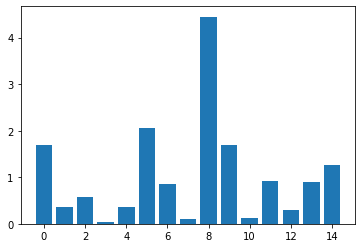

In [10]:
# assess scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i,fs.scores_[i]))
plt.bar([i for i in range(len(fs.scores_))],fs.scores_)
plt.show()

Feature 0: 4.448314
Feature 1: 2.051227
Feature 2: 1.701274
Feature 3: 1.699308
Feature 4: 1.253803
Feature 5: 0.927470
Feature 6: 0.901014
Feature 7: 0.845559
Feature 8: 0.572018
Feature 9: 0.364802
Feature 10: 0.356320
Feature 11: 0.289328
Feature 12: 0.135138
Feature 13: 0.100618
Feature 14: 0.039284


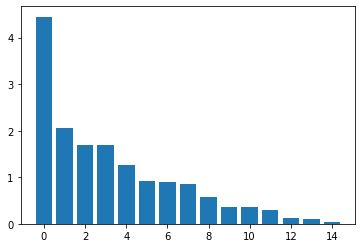

In [11]:
# assess scores for the features
f_sorted = sorted(fs.scores_,reverse=True)
for i in range(len(f_sorted)):
    print('Feature %d: %f' % (i,f_sorted[i]))
plt.bar([i for i in range(len(f_sorted))],f_sorted)
plt.show()

For model-based decision-making, with the mutual info theory, like evertthing up to featyre 27 is predictive. With f_regression, everything up to feature 29 is predictive.

So, for metacontrol depending on f_regression, I should select ~ 15 predictors, and based on the mutual info theory, more (like 24)


## PCA for modelling

In [12]:
# USE only the EF functions for the factor (not age and gender) and also not intelligence. so from factor 13
X = dataset.iloc[:,12:].values
y = dataset.iloc[:,1].values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)
print('Train',X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (62, 15) (62,)
Test (12, 15) (12,)


In [14]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
#y_train = sc_y.fit_transform([y_train])

from sklearn.decomposition import PCA

pca = PCA(n_components = 0.90)

pca.fit(X_train)
train_components = pca.transform(X_train)

In [15]:
dataset.iloc[:,12:]

,ssrt_t0,axcpt_ay_bx_t0,axcpt_PBI_t0,flankerinh_t0,flankerswitch_t0,stroop_t0,dprimeONEBACK_t0,dprimeTWOBACK_t0,Max_Span,Higher_Acc,CorrRT_2SD,B3_switch_cost_Acc,mixing_cost_Acc,B3_switch_cost_CorrRT_2SD,mixing_cost_CorrRT_2SD
0,260.00000,-0.174010,-0.696260,0.303618,-0.035289,-0.818045,0.958333,0.851190,7,45.454545,1847.469940,-12.918660,0.000000,176.281046,299.294872
1,233.46153,0.675286,0.431760,-0.563637,-0.242714,-0.013837,0.958333,0.880952,5,16.666667,1484.030556,-27.272727,0.000000,93.596491,-9.688889
2,319.00000,-0.352555,-0.433764,0.140001,-0.525759,-0.205424,0.607143,-0.023810,4,0.000000,2902.550000,15.789474,-10.000000,123.828571,228.266667
3,319.00000,-0.051232,-0.063924,-1.201361,0.193632,-0.941024,0.630952,-0.166667,4,22.222222,3183.344444,11.961722,6.666667,620.166667,517.692982
4,243.15384,-0.374064,-0.597904,0.246747,0.679340,0.085989,0.833333,0.833333,6,50.000000,2173.316667,0.000000,0.000000,195.210526,-68.896552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,251.00000,0.222478,-0.059368,-0.212403,0.572747,0.187235,-0.083333,0.023810,6,36.363636,1580.202381,-9.090909,-3.333333,182.111111,-48.740741
70,286.00000,0.120406,-0.064548,-0.689489,0.136637,-0.980713,0.958333,0.714286,6,45.454545,1582.988095,5.263158,-3.333333,349.235294,314.820000
71,125.00000,-0.394379,0.600552,-0.551108,-0.580802,1.375602,0.630952,0.797619,6,27.272727,1710.119444,-16.746411,30.000000,208.400000,-555.000000
72,275.00000,-0.556015,-0.438972,-0.551108,0.814565,-0.565334,0.880952,0.464286,7,45.454545,1904.569345,-18.181818,-6.666667,82.833333,-58.666667


In [16]:
principalDF = pd.DataFrame(data = train_components)
principalDF

,0,1,2,3,4,5,6,7,8,9
0,-1.485139,0.300589,-0.798905,1.122798,0.446692,-0.488434,0.050761,-2.013543,0.942076,0.823482
1,-0.705701,0.776118,-1.060651,-0.600593,1.107269,-0.199784,-1.321094,-0.087162,-0.136159,-0.087935
2,-1.559846,-2.297850,-0.801812,0.133878,-0.173910,0.451633,0.107565,0.735819,0.267718,-0.100244
3,-1.502700,2.585176,1.576142,-0.710356,0.997005,-0.980826,-1.343653,0.633515,-1.419669,0.454985
4,0.542859,-1.193856,1.050627,0.729858,1.191292,-1.562356,0.062667,-1.125668,-0.905239,0.117332
...,...,...,...,...,...,...,...,...,...,...
57,-1.396095,0.387887,-1.932323,0.069205,-1.050201,-0.300344,0.241210,0.529431,-0.502576,0.066792
58,1.055994,-2.421832,-1.437928,0.762675,-0.401575,1.032134,-1.240429,-1.716478,-0.094397,1.649471
59,0.351924,-0.278954,-0.759288,0.012349,1.820276,0.778740,-0.034684,0.625372,-0.222737,0.668194
60,0.159071,1.706784,-0.654862,-0.449990,-0.905211,-0.230444,-1.487580,-2.105425,-0.673960,0.032595


In [17]:
pca.n_components_

10

So 20 components explain 95% of the variance, so we reduced from 33

In [18]:
# import matplotlib.pyplot as plt
# from matplotlib.pyplot import figure, get_cmap, colorbar, show


# class_num = 62
# sample_num = 16

# idx_range = class_num * sample_num
# fig = figure(figsize=(6,3),dpi=300)
# ax=fig.add_subplot(1,1,1)
# c_map = get_cmap(name='viridis',lut=class_num)
# scatter = ax.scatter(components[:idx_range,0], components[:idx_range,1],
#                     c=y_train[:idx_range],s=10,cmap=c_map)
# colorbar(mappable=scatter)

In [19]:
from sklearn.decomposition import KernelPCA

transformer = KernelPCA(n_components = 95)
components = transformer.fit_transform(X_train)

In [20]:
principalDF2 = pd.DataFrame(data = components)
principalDF2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
0,-1.485139,0.300589,-0.798905,1.122798,0.446692,-0.488434,0.050761,-2.013543,0.942076,0.823482,0.515257,0.178382,-0.098177,-0.497483,-0.535572,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,...,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0
1,-0.705701,0.776118,-1.060651,-0.600593,1.107269,-0.199784,-1.321094,-0.087162,-0.136159,-0.087935,1.594535,0.008513,-0.353972,0.341477,-0.514981,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,...,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0
2,-1.559846,-2.297850,-0.801812,0.133878,-0.173910,0.451633,0.107565,0.735819,0.267718,-0.100244,-0.019502,-0.269337,0.498519,0.350363,0.067004,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,...,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0
3,-1.502700,2.585176,1.576142,-0.710356,0.997005,-0.980826,-1.343653,0.633515,-1.419669,0.454985,0.104018,-1.051740,-0.285155,0.657406,-0.307490,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,...,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0
4,0.542859,-1.193856,1.050627,0.729858,1.191292,-1.562356,0.062667,-1.125668,-0.905239,0.117332,-0.652411,-1.202200,0.258420,-0.290089,-0.240548,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,-1.396095,0.387887,-1.932323,0.069205,-1.050201,-0.300344,0.241210,0.529431,-0.502576,0.066792,0.251411,-0.370653,0.341551,0.128240,-0.557213,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,...,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0
58,1.055994,-2.421832,-1.437928,0.762675,-0.401575,1.032134,-1.240429,-1.716478,-0.094397,1.649471,0.347311,0.858476,-0.580311,-0.214793,0.354277,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,...,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0
59,0.351924,-0.278954,-0.759288,0.012349,1.820276,0.778740,-0.034684,0.625372,-0.222737,0.668194,-0.742624,0.210884,-0.026953,-0.150640,-0.230373,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,...,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0
60,0.159071,1.706784,-0.654862,-0.449990,-0.905211,-0.230444,-1.487580,-2.105425,-0.673960,0.032595,-0.559505,0.544092,0.652431,-0.942099,-0.159692,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0


## Bayesian Model

In [ ]:
from sklearn.linear_model import BayesianRidge
regressor = BayesianRidge()
regressor.fit(train_pca, y_train)

In [ ]:
y_pred = regressor.predict(test_pca)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# r2 score
print('r2: %.3f' % r2_score(y_test, y_pred))

# evaluate predictions
mae = mean_absolute_error(y_test,y_pred)
print('MAE: %.3f' % mae)

mse = mean_squared_error(y_test,y_pred)
print('MAE: %.3f' % mse)

### I need to make a script to reiterate over models several times, with e.g. different random states

In [ ]:
r2_score(y_test, y_pred)

In [ ]:
iters = range(1,101)
print(iters)

r2= np.zeros(iters[1])
mae_score = np.zeros(iters[1])
mse_score = np.zeros(iters[1])

for i, it in enumerate(iters):
    #print(it)
    print(r2[i])
    
    
    # split into train and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = it)
    
    # train regressor
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    
    r2[i] = r2_score(y_test, y_pred)
    mae_score[i] = mean_absolute_error(y_test,y_pred)
    mse_score[i] = mean_squared_error(y_test,y_pred)
    
return min(r2)
    


In [ ]:
iters = range(1,101)
print(iters)

r2 = np.zeros(len(iters))
mae_score = np.zeros(len(iters))
mse_score = np.zeros(len(iters))

for i, it in enumerate(iters):
    #print(it)
    
    # split into train and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = it)
    
    # train regressor
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
        
    r2[i] = r2_score(y_test, y_pred)
    mae_score[i] = mean_absolute_error(y_test,y_pred)
    mse_score[i] = mean_squared_error(y_test,y_pred)
    
print(min(r2))
print(max(r2))
print(r2.mean())
print(np.median(r2))

In [ ]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [ ]:
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
scores

In [ ]:
# first model with an arbitrary choice of n_features
# running RFE with number of features=10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=10)             
rfe = rfe.fit(X_train, y_train)

In [ ]:
# tuples of (feature name, whether selected, ranking)
# note that the 'rank' is > 1 for non-selected features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
# predict prices of X_test
y_pred = rfe.predict(X_test)

# evaluate the model on test set
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

In [ ]:
# the other way of doing the same thing (more explicit)

# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
scores

In [ ]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)  

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [ ]:
# final model
n_features_optimal = 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

# LOOCV for all models simultaneously

In [ ]:
# list all models to evaluate

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')

def get_models():
    models = dict()
    # lr 
    rfe = RFECV(estimator=LinearRegression())
    model = RandomForestRegressor(n_estimators = 100, random_state = 0)
    models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
    # polynomial 3
    poly_reg = PolynomialFeatures(degree = 3)
    X_poly = poly_reg.fit_transform(X)
    rfe = RFECV(estimator=LinearRegression())
    model = RandomForestRegressor(n_estimators = 100, random_state = 0)
    models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
    # polynomial 4
    
    # polynomial 5
    
    # polynomial 6
    
    # SVR (linear)
    rfe = RFECV(estimator=SVR(kernel = 'linear'))
    model = RandomForestRegressor(n_estimators = 100, random_state = 0)
    models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # Decision tree
    
    # random forest regression
    